# Plots by depth

Evaluate the distribution and attributes of features by depth.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Import data and define constants

In [13]:
picks = pd.read_csv('1_Pre-processed data.csv')
picks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      442 non-null    float64
 1   dip_az       442 non-null    float64
 2   dip          442 non-null    float64
 3   aperture_mm  442 non-null    float64
 4   type         442 non-null    object 
 5   strike       442 non-null    float64
 6   lithology    442 non-null    object 
 7   depth_ft     442 non-null    float64
dtypes: float64(6), object(2)
memory usage: 27.8+ KB


In [14]:
picks.type.unique()

array(['Conductive, HC', 'Conductive, LC', 'Bed boundary'], dtype=object)

In [15]:
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')]
fractures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      242 non-null    float64
 1   dip_az       242 non-null    float64
 2   dip          242 non-null    float64
 3   aperture_mm  242 non-null    float64
 4   type         242 non-null    object 
 5   strike       242 non-null    float64
 6   lithology    242 non-null    object 
 7   depth_ft     242 non-null    float64
dtypes: float64(6), object(2)
memory usage: 17.0+ KB


In [16]:
beds = picks[(picks['type'] == 'Bed boundary')]
beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 242 to 441
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      200 non-null    float64
 1   dip_az       200 non-null    float64
 2   dip          200 non-null    float64
 3   aperture_mm  200 non-null    float64
 4   type         200 non-null    object 
 5   strike       200 non-null    float64
 6   lithology    200 non-null    object 
 7   depth_ft     200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.1+ KB


In [17]:
# Use the picks DataFrame to define log top and bottom depths

top_m = picks['depth_m'].min() - 1
bot_m = picks['depth_m'].max() + 1

print(bot_m, top_m)

998.205751040047 500.7874002119409


In [32]:
mudlog = pd.read_csv('1_pre-processed mudlog.csv')
print(mudlog.info())
mudlog.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   from_m     2 non-null      int64 
 1   to_m       2 non-null      int64 
 2   lithology  2 non-null      object
 3   lith_num   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,from_m,to_m,lithology,lith_num
0,500,750,Rock A,0
1,750,1000,Rock B,1


## 1. Use Seaborn to evaluate pick attributes by depth

In [ ]:
# lithology

In [ ]:
# fracture aperture

## 3. Calculate frequency histograms

In [19]:
def pick_histogram_param(depths, log_top, log_base, count_interval=10,):
    """
    Derive parameters for plotting a frequency histogram that shows 
    the average number of picks per unit length (ie m or ft) within each count_interval.

    Parameters:
    - depths (array-like): A sequence of depth values for which to calculate parameters.
    - log_top (float): The top (shallowest) depth of the log. Must be above the shallowest pick.
    - log_base (float): The base (deepest) depth of the log. Must be below the deepest pick.
    - count_interval (float): The desired histogram bin width. Default is 10.

    Returns:
    - tuple: A tuple containing the following parameters:
        - bin_mids (array): Midpoints of histogram bins.
        - bin_width (float): Width of histogram bins.
        - counts (array): Counts of data points in each histogram bin.
        - counts_per_bin (array): Counts per unit length for each bin.

    Notes:
    - This function calculates parameters for creating histograms where bin width
      is controlled by log length, ensuring consistent binning for varying log depths.
    - The `count_interval` parameter controls the width of histogram bins in linear space.
    """
    n_bins = round((log_base - log_top) / count_interval)
    if n_bins < 3: n_bins = 3

    counts,bin_edges = np.histogram(depths, bins = n_bins)
    bin_mids = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width = bin_edges[1] - bin_edges[0]
    counts_per_bin = counts/bin_width

    return bin_mids, bin_width, counts, counts_per_bin


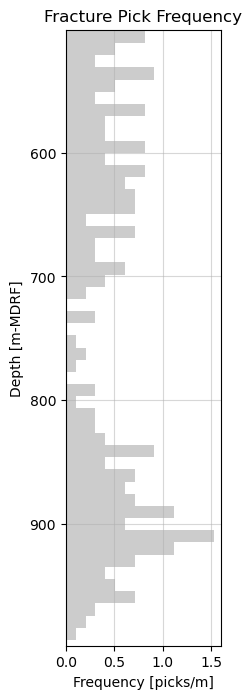

In [30]:
#
# calculate values for histogram
#

depths = fractures.depth_m.values

bin_mids, bin_width, counts, counts_per_bin = pick_histogram_param(
    depths,
    top_m, 
    bot_m, 
    10, # length of each interval/bin
)

#
# plot histogram
#

fig, ax1 = plt.subplots(1,1,figsize=(2,8))

plt.title('Fracture Pick Frequency')

ax1.barh(
    bin_mids, 
    counts_per_bin, 
    bin_width,
    color='k',
    alpha=0.2,
)

ax1.set_ylim(bot_m, top_m)
ax1.set_ylabel('Depth [m-MDRF]')

ax1.xaxis.set_ticks([0,0.5,1,1.5])
ax1.set_xlabel('Frequency [picks/m]')

ax1.grid(alpha=0.5)

plt.savefig(
    '2_By-depth plots_histogram.png', 
    dpi=400, 
    bbox_inches='tight', 
    transparent=True
)